<a href="https://colab.research.google.com/github/PradeepKumarM30/MachineLearningtechniques/blob/main/DIGITALASSIGNMENT-THEORY/DAONE20MAI0030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question : Prepare a dataset based on the personal account of observations. Add the predictor variables and response variable accordingly. Train a classifier for your data and print any one of the accuracy metrics.**

# **Note about the dataset**
# The dataset contains the information from the previous assembly election held in Tamil Nadu(2016). The source of the dataset is verified by the Election Commision of India (link: https://eci.gov.in/files/category/90-tamil-nadu/)
# Here the features that I have taken are described shortly below
#  1.**Year** - Used only 2016 
#  2.**Male,Female and Third Gender Voters**  - Total number voters in each gender which greatly influence a party's winning chances
#   3. **Constituency type** - Some parties have a good track record when constituency type is considered
#   4. **Constituency Name** - The Name of the constituency
#   5. **Previous Year Winner and Margin** with which the party won
#   6. **Candidate Sex** - Now a days this plays an important role as people generally beleive women candidates more than male candidates

#**Target** - Which party won the election at that constituency

   


# **Step1: Add Neccesary imports**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# **Step 2: Import Your Dataset (From Local Machine)**



In [ ]:
election_dataset = pd.read_excel ("/content/sample_data/TamilNaduElectionDataset.xlsx")
election_dataset.to_csv ("/content/sample_data/TamilNaduElectionsDataset.csv", 
                  index = None,
                  header=True)
df = pd.read_csv("/content/sample_data/TamilNaduElectionsDataset.csv")
df

,Year,Male_Votes,Female_Votes,Third_Gender_Votes,Const_Type,Const_Name,Prev_Year_Winner,Prev_Year_Margin,Prev_Year_Poll_Percent,Candidate_Sex,Winner
0,2016,124544,129911,103,GEN,Dr.Radhakrishnan Nagar,AIADMK,31255,72.72,F,AIADMK
1,2016,127682,132100,61,GEN,Kolathur,DMK,2734,68.47,M,DMK
2,2016,125497,127717,13,GEN,Thiruvarur,DMK,50249,82.69,M,DMK
3,2016,94865,92050,7,SC,Gandharvakottai,AIADMK,19699,80.21,M,AIADMK
4,2016,115161,117967,28,SC,Srivilliputhur,CPI,6228,80.09,F,AIADMK
5,2016,101499,101015,3,GEN,Viralimalai,AIADMK,39309,86.06,M,AIADMK
6,2016,112134,117719,15,GEN,Katpadi,DMK,2973,79.55,M,DMK
7,2016,153518,150842,14,GEN,Coimbatore (North),AIADMK,40098,70.02,M,AIADMK
8,2016,122762,122539,6,GEN,Coimbatore (South),AIADMK,27796,71.59,M,AIADMK
9,2016,123424,126914,65,SC,Ponneri,AIADMK,31270,80.46,F,DMK


# **Step 3: Observations and insights from dataset**

# **1. Parties which wins the election last tenure have the highest possibilty of winning it the current time, whereas we should also have in mind the anti incumbency and hence model accordingly**
# **2. Star politicians make their victory theirs by contesting in their constituency (Eg.kolathur, Eddapadi, RK Nagar(Not Anymore))**


In [ ]:
#Create a new column called Const Party to plot
#it against the gender 
df_new = df
df_new["Const_Party"] = df["Const_Name"] + "-" +  df["Winner"]
df_new

,Year,Male_Votes,Female_Votes,Third_Gender_Votes,Const_Type,Const_Name,Prev_Year_Winner,Prev_Year_Margin,Prev_Year_Poll_Percent,Candidate_Sex,Winner,Const_Party
0,2016,124544,129911,103,GEN,Dr.Radhakrishnan Nagar,AIADMK,31255,72.72,F,AIADMK,Dr.Radhakrishnan Nagar-AIADMK
1,2016,127682,132100,61,GEN,Kolathur,DMK,2734,68.47,M,DMK,Kolathur-DMK
2,2016,125497,127717,13,GEN,Thiruvarur,DMK,50249,82.69,M,DMK,Thiruvarur-DMK
3,2016,94865,92050,7,SC,Gandharvakottai,AIADMK,19699,80.21,M,AIADMK,Gandharvakottai-AIADMK
4,2016,115161,117967,28,SC,Srivilliputhur,CPI,6228,80.09,F,AIADMK,Srivilliputhur-AIADMK
5,2016,101499,101015,3,GEN,Viralimalai,AIADMK,39309,86.06,M,AIADMK,Viralimalai-AIADMK
6,2016,112134,117719,15,GEN,Katpadi,DMK,2973,79.55,M,DMK,Katpadi-DMK
7,2016,153518,150842,14,GEN,Coimbatore (North),AIADMK,40098,70.02,M,AIADMK,Coimbatore (North)-AIADMK
8,2016,122762,122539,6,GEN,Coimbatore (South),AIADMK,27796,71.59,M,AIADMK,Coimbatore (South)-AIADMK
9,2016,123424,126914,65,SC,Ponneri,AIADMK,31270,80.46,F,DMK,Ponneri-DMK


Text(0, 0.5, 'No Of Voters')

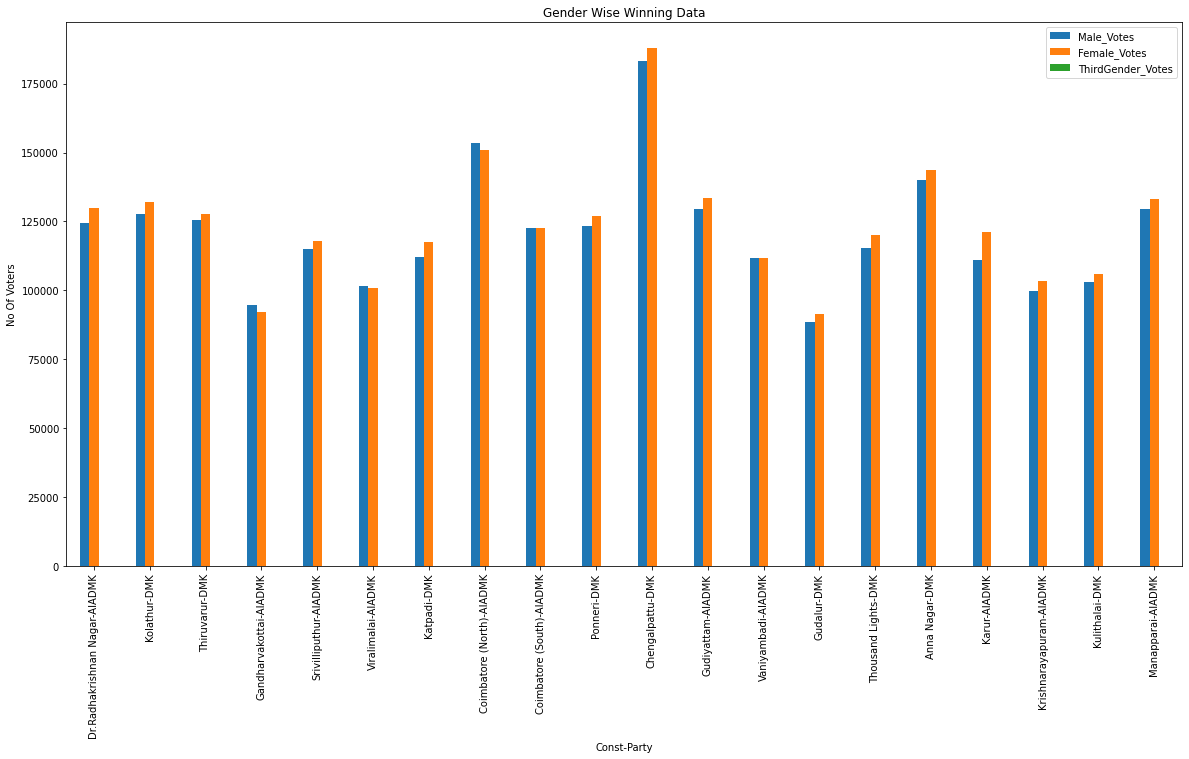

In [ ]:
plotdata = pd.DataFrame({
    "Male_Votes":df_new["Male_Votes"].tolist(),
    "Female_Votes":df_new["Female_Votes"].tolist(),
    "ThirdGender_Votes":df_new["Third_Gender_Votes"].tolist()
    }, 
    index=df_new["Const_Party"].tolist()
)
plotdata.plot(kind="bar",figsize = (20,10))

plt.title("Gender Wise Winning Data")
plt.xlabel("Const-Party")
plt.ylabel("No Of Voters")



# **3. Female voters are mostly high in all constituencies. When Male is high, AIADMK is highly likely to win**

In [ ]:
#Now a more informative insight is here !
df.groupby(['Winner','Prev_Year_Winner']).mean()

Year  ...  Prev_Year_Poll_Percent
Winner Prev_Year_Winner          ...                        
AIADMK AIADMK            2016.0  ...               78.925556
       CPI               2016.0  ...               78.585000
DMK    AIADMK            2016.0  ...               75.735000
       DMDK              2016.0  ...               74.080000
       DMK               2016.0  ...               75.607500

[5 rows x 6 columns]

# **4. AIADMK wins by highest margins for past two tenures**
# **5. DMDK and CPI seems to have won though a slip or very small margin**
# **6. Third Gender votes, though very small, works in favour of DMK**


# **STEP 4: Feature Engineering**

# **1. Change Constituency type to binary**
# **2. Encoding Constituency Name**
# **3. Encode Prev year winner and target**
# **4. Encode Candidate sex**

In [ ]:
df['Candidate_Sex'] = df['Candidate_Sex'].apply(lambda val:1 if val == 'M' else 0) #point no 4
df['Winner'] = df['Winner'].apply(lambda val:1 if val == 'AIADMK' else (2 if val == 'DMK' else 3)) #point no 3
df["Const_Name"] = df["Const_Name"].astype('category')
df["Const_Name_enc"] = df["Const_Name"].cat.codes  #point no 2
df['Const_Type'] = df['Const_Type'].apply(lambda val:1 if val == 'SC' else 0) #point no 2
df['Prev_Year_Winner'] = df['Prev_Year_Winner'].apply(lambda val:1 if val == 'AIADMK' else (2 if val == 'DMK' else 3)) #point no 3



In [ ]:
df = df.drop(['Const_Name','Const_Party','Year'],axis=1) #Because we have encoded constname we remove. We used constparty only 
#for plotting graph, Year is same so we remove it

#Now view the ready-for-training dataframe

df


,Male_Votes,Female_Votes,Third_Gender_Votes,Const_Type,Prev_Year_Winner,Prev_Year_Margin,Prev_Year_Poll_Percent,Candidate_Sex,Winner,Const_Name_enc
0,124544,129911,103,0,1,31255,72.72,0,1,4
1,127682,132100,61,0,2,2734,68.47,1,2,10
2,125497,127717,13,0,2,50249,82.69,1,2,16
3,94865,92050,7,1,1,19699,80.21,1,1,5
4,115161,117967,28,1,3,6228,80.09,0,1,15
5,101499,101015,3,0,1,39309,86.06,1,1,19
6,112134,117719,15,0,2,2973,79.55,1,2,9
7,153518,150842,14,0,1,40098,70.02,1,1,2
8,122762,122539,6,0,1,27796,71.59,1,1,3
9,123424,126914,65,1,1,31270,80.46,0,2,14


# **STEP 5 : Get to the scene - model training**

In [30]:
#Assign X and Y variables
X = df.drop("Winner",axis = 1)
Y = df["Winner"]

# **Model 1 : Logistic Regression**

In [31]:
#Split train and test Model, Train and obtain the classification report
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 25)
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train,Y_train)  
Y_pred =logit.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



# **Model 2: Logistic Regression CV**

In [33]:
logitCV = LogisticRegressionCV(cv = 5, scoring = 'accuracy', max_iter = 1000).fit(X_train,Y_train)
Y_pred = logitCV.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.33      0.40         3

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4



# **Model 3: Bayesian Approach**

In [34]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred =gnb.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.25      1.00      0.40         1
           2       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Model 4: Decision Tree Classifier**

In [35]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.25      1.00      0.40         1
           2       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 25)
perceptron = Perceptron(max_iter=1000)
logit.fit(X_train,Y_train)  
Y_pred =logit.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



# **STEP 6 - Inference : Finally It can be inferred that all models except the logistic regression and perceptron acheive very less Accuracy which may possibly be due to the very small dataset. On obtaining an even more bigger dataset with vast distribution of data across many election rather than just one year as I did, the accuracy can be improved considerably**